# **Modul 5 Data Mining 2020 "k-Means"**

## **Introduction**

K-Means Clustering adalah algoritma pembelajaran mesin tanpa pengawasan. Berbeda dengan algoritma pembelajaran mesin yang diawasi tradisional, K-Means berupaya untuk mengklasifikasikan data tanpa terlebih dahulu dilatih dengan data berlabel.

Beberapa aplikasi dunia nyata dari k-means:
- Segmentasi pelanggan
- Memahami apa yang ingin dicapai oleh pengunjung situs web
- Pengenalan pola
- Pembelajaran mesin
- Kompresi data

## **How It Works**

1.   Pilih titik acak K (yaitu 2) sebagai pusat cluster yang disebut centroid
![alt text](https://miro.medium.com/max/1610/1*EW-5MNBE3mxHS90KIBEAtQ.png)

2.   Tetapkan setiap titik data ke kluster terdekat dengan menghitung jaraknya terhadap setiap centroid
![alt text](https://miro.medium.com/max/1590/1*6jruJmmnxtSOj4cuwv91Hg.png)

3.  Tentukan pusat cluster baru dengan menghitung rata-rata poin yang ditugaskan
![alt text](https://miro.medium.com/max/1584/1*blMy7iRv9R2ceDD2XILjbQ.png)

4.  Ulangi langkah 2 dan 3 sampai tidak ada tugas cluster yang berubah
![alt text](https://miro.medium.com/max/1632/1*GVQnG8FnP4L6jbHsO3oWOQ.png)



## **Choosing The Right Number of Clusters**

Meskipun k-means bekerja dengan baik pada dataset mainan ini, penting untuk menegaskan kembali bahwa kelemahan k-means adalah bahwa kita harus menentukan jumlah cluster, k, sebelum kita tahu apa k optimal. Jumlah cluster untuk memilih mungkin tidak selalu begitu jelas dalam aplikasi dunia nyata, terutama jika kita bekerja dengan dataset dimensi yang lebih tinggi yang tidak dapat divisualisasikan.

Metode siku adalah alat grafis yang berguna untuk memperkirakan jumlah optimal k untuk tugas yang diberikan. Secara intuitif, kita dapat mengatakan bahwa, jika k meningkat, SSE dalam-kluster ("distorsi") akan berkurang. Ini karena sampel akan lebih dekat ke centroid tempat mereka ditugaskan.
Gagasan di balik metode siku adalah untuk mengidentifikasi nilai k di mana distorsi mulai berkurang paling cepat, yang akan menjadi lebih jelas jika kita merencanakan distorsi untuk nilai k yang berbeda:

![alt text](https://miro.medium.com/max/677/1*Q9OzABjrHuY1uFIcEe8tlg.png)

Seperti yang dapat kita lihat dalam plot yang dihasilkan, siku terletak di k = 3, yang merupakan bukti bahwa k = 3 memang pilihan yang baik untuk dataset ini.

## **K-Means Clustering using Scikit-Learn**

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import random 
%matplotlib inline

Dalam tutorial ini, kita akan menghasilkan data kita sendiri menggunakan fungsi make_blobs dari modul sklearn.datasets. Parameter pusat menentukan jumlah cluster.

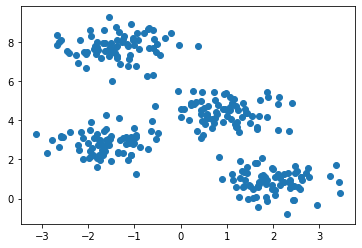

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

Untuk mendapatkan nilai yang digunakan dalam grafik, kami melatih beberapa model menggunakan jumlah cluster yang berbeda dan menyimpan nilai properti *intertia_* (WCSS=Within Cluster Sum of Square) setiap kali.

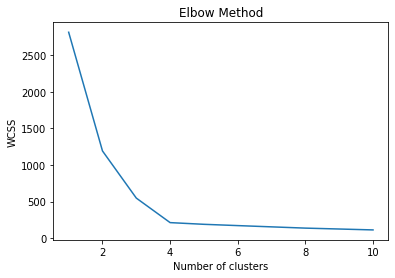

In [5]:
wcss = []
for i in range(1, 11):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    #for the sake of simplicity, you can just specify the number of cluster
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Selanjutnya, kami mengelompokkan data menggunakan jumlah cluster optimal (4) yang kami tentukan pada langkah terakhir. k-means ++ memastikan bahwa kami tidak jatuh ke dalam perangkap inisialisasi acak.

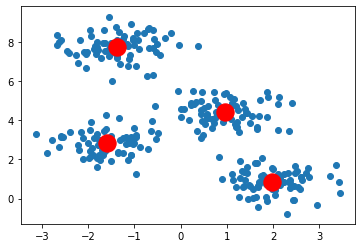

In [6]:
#kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
#for the sake of simplicity, you can just specify the number of cluster
kmeans = KMeans(n_clusters=4)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()